In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

from datetime import timedelta
from notebook_utils import NotebookUtilities
from pandas import DataFrame
import humanize
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as osp
import pandas as pd
import re

nu = NotebookUtilities(
    data_folder_path=osp.abspath('../data'),
    saves_folder_path=osp.abspath('../saves')
)


# Visualize a Timeline of India vs China Anthropogenic Disasters

In [13]:

if nu.pickle_exists('anthropogenic_disasters_df'):
    anthropogenic_disasters_df = nu.load_object('anthropogenic_disasters_df', verbose=False)
    print(anthropogenic_disasters_df.shape)
    mask_series = (anthropogenic_disasters_df.percent_india > 0.0) | (anthropogenic_disasters_df.percent_china > 0.0)
    display(anthropogenic_disasters_df[mask_series].sort_values('Start'))

(119, 11)


,Event,Lowest estimate,Highest estimate,Geometric mean estimate,Location,Start,End,Duration,Notes,percent_china,percent_india
76,Kalinga War,220000,250000,234521,India,-321,-261,60 years,nan,0.000000,100.000000
19,Qin's wars of unification,2000000,2000000,2000000,China,-230,-221,9 years,See also: History of China,100.000000,0.000000
14,Yellow Turban Rebellion,3000000,7000000,4582576,China (Han dynasty),184,205,22 years,Part of the Three Kingdoms War,100.000000,0.000000
7,An Lushan Rebellion,13000000,13000000,13000000,China,755,763,8 years,A civil war in Tang China. Also known as the A...,100.000000,0.000000
1,Mongol invasions and conquests,30000000,57000000,41352146,Eurasia,1206,1405,199 years,"See also: Mongol Empire, Destruction under the...",30.000000,24.000000
4,Transition from Ming to Qing,25000000,25000000,25000000,China,1618,1683,65 years,See also: Qing dynasty,100.000000,0.000000
12,Mughal–Maratha Wars,600000,5600000,3200000,India,1680,1707,27 years,nan,0.000000,100.000000
55,Maratha invasions of Bengal,400000,400000,400000,India,1741,1751,10 years,nan,0.000000,100.000000
2,Taiping Rebellion,20000000,30000000,28284271,China,1850,1864,14 years,"A civil war in China. See also: Qing dynasty, ...",100.000000,0.000000
31,Panthay Rebellion,890000,1000000,943398,China,1856,1873,18 years,nan,100.000000,0.000000



## For this visualization, match the start year and end year with the Lowest estimate and Highest estimate to get some kind of growth

In [54]:

mask_series = (anthropogenic_disasters_df.percent_india > 0.0) | (anthropogenic_disasters_df.percent_china > 0.0)
china_cumuls_list = []
india_cumuls_list = []
for row_index, row_series in anthropogenic_disasters_df[mask_series].sort_values('Start').iterrows():
    # event_name = row_series.Event
    lowest_estimate = row_series['Lowest estimate']
    highest_estimate = row_series['Highest estimate']
    start_year = row_series.Start
    stop_year = row_series.End
    
    percent_china = row_series.percent_china
    china_cumul = int(percent_china * lowest_estimate / 100)
    china_tuple = (start_year, china_cumul)
    china_cumuls_list.append(china_tuple)
    china_cumul = int(percent_china * (highest_estimate - lowest_estimate) / 100)
    china_tuple = (stop_year, china_cumul)
    china_cumuls_list.append(china_tuple)
    
    percent_india = row_series.percent_india
    india_cumul = int(percent_india * lowest_estimate / 100)
    india_tuple = (start_year, india_cumul)
    india_cumuls_list.append(india_tuple)
    india_cumul = int(percent_india * (highest_estimate - lowest_estimate) / 100)
    india_tuple = (stop_year, india_cumul)
    india_cumuls_list.append(india_tuple)

china_cumuls_list = sorted(china_cumuls_list, key=lambda china_tuple: china_tuple[0])
china_years_list = [china_tuple[0] for china_tuple in china_cumuls_list]
china_cumuls_list = pd.Series([china_tuple[1] for china_tuple in china_cumuls_list]).cumsum().tolist()

india_cumuls_list = sorted(india_cumuls_list, key=lambda india_tuple: india_tuple[0])
india_years_list = [india_tuple[0] for india_tuple in india_cumuls_list]
india_cumuls_list = pd.Series([india_tuple[1] for india_tuple in india_cumuls_list]).cumsum().tolist()

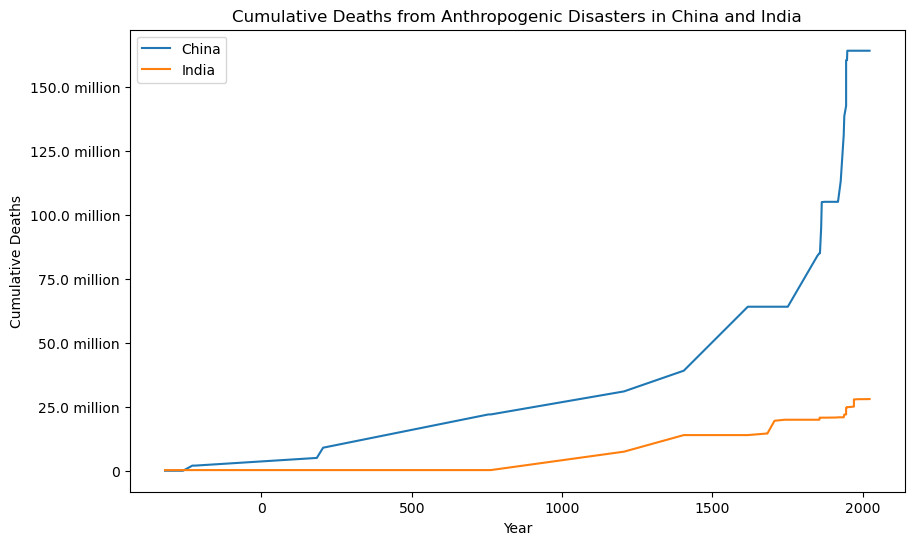

In [61]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(china_years_list, china_cumuls_list, label='China')
ax.plot(india_years_list, india_cumuls_list, label='India')

ax.set_xlabel('Year')

# Humanize y tick labels
plt.ylabel('Cumulative Deaths')
yticklabels_list = []
for text_obj in ax.get_yticklabels():
    text_obj.set_text(humanize.intword(int(text_obj.get_position()[1])))
    yticklabels_list.append(text_obj)
ax.set_yticklabels(yticklabels_list)

ax.set_title('Cumulative Deaths from Anthropogenic Disasters in China and India')
ax.legend()

plt.show()


## For this visualization, use the start year and end year to cut the Geometric mean estimate

In [77]:

mask_series = (anthropogenic_disasters_df.percent_india > 0.0) | (anthropogenic_disasters_df.percent_china > 0.0)
china_cumuls_dict = {}
india_cumuls_dict = {}
for row_index, row_series in anthropogenic_disasters_df[mask_series].sort_values('Start').iterrows():
    # event_name = row_series.Event
    gme = row_series['Geometric mean estimate']
    start_year = row_series.Start
    stop_year = row_series.End
    
    percent_china = row_series.percent_china
    china_deaths = int(gme * percent_china / 100)
    if (start_year == stop_year):
        years = [start_year]
        values = [china_deaths]
    else:
        years = np.arange(start_year, stop_year + 1)
        values = china_deaths / (stop_year - start_year) * (years - years + 1)
    for year, value in zip(years, values): china_cumuls_dict[year] = china_cumuls_dict.get(year, 0) + int(value)
    
    percent_india = row_series.percent_india
    india_deaths = int(gme * percent_india / 100)
    if (start_year == stop_year):
        years = [start_year]
        values = [india_deaths]
    else:
        years = np.arange(start_year, stop_year + 1)
        values = india_deaths / (stop_year - start_year) * (years - years + 1)
    for year, value in zip(years, values): india_cumuls_dict[year] = india_cumuls_dict.get(year, 0) + int(value)

china_cumuls_list = sorted([(year, value) for year, value in china_cumuls_dict.items()], key=lambda china_tuple: china_tuple[0])
china_years_list = [china_tuple[0] for china_tuple in china_cumuls_list]
china_cumuls_list = pd.Series([china_tuple[1] for china_tuple in china_cumuls_list]).cumsum().tolist()

india_cumuls_list = sorted([(year, value) for year, value in india_cumuls_dict.items()], key=lambda india_tuple: india_tuple[0])
india_years_list = [india_tuple[0] for india_tuple in india_cumuls_list]
india_cumuls_list = pd.Series([india_tuple[1] for india_tuple in india_cumuls_list]).cumsum().tolist()

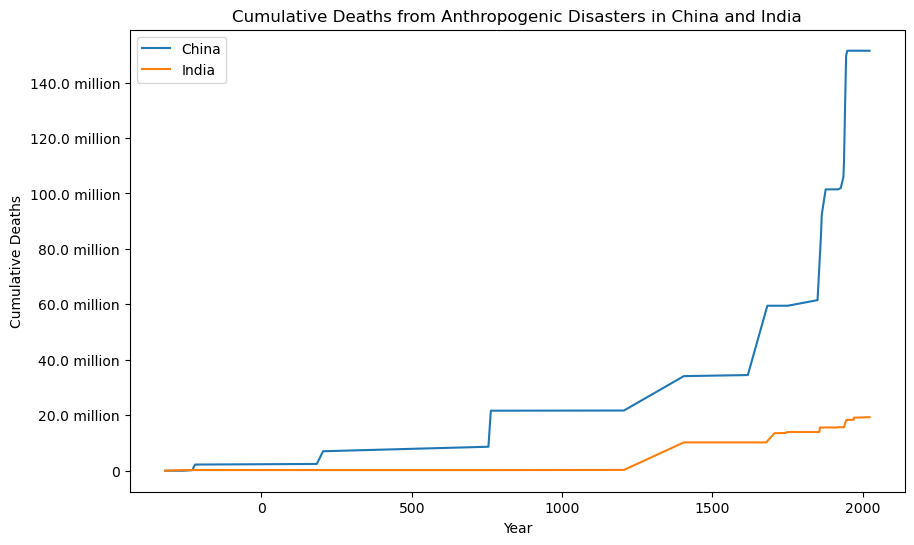

In [78]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(china_years_list, china_cumuls_list, label='China')
ax.plot(india_years_list, india_cumuls_list, label='India')

ax.set_xlabel('Year')

# Humanize y tick labels
plt.ylabel('Cumulative Deaths')
yticklabels_list = []
for text_obj in ax.get_yticklabels():
    text_obj.set_text(humanize.intword(int(text_obj.get_position()[1])))
    yticklabels_list.append(text_obj)
ax.set_yticklabels(yticklabels_list)

ax.set_title('Cumulative Deaths from Anthropogenic Disasters in China and India')
ax.legend()

plt.show()